# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 10) )

# Parameters

In [2]:
# number of symbols and symbol time
n_symb = 10
t_symb = 1.0 

# upsampling 
n_up = 256            # samples per symbol
t_sample = t_symb / n_up

# vector denoting time samples
t_vec = np.arange( 0, n_symb, t_sample )

# carrier frequency
f_c = 10


# Baseband to band-pass

In [3]:
# NOTE: CAPITALS describing frequency regime

# define filter response of rectangular      
rect = np.append( np.ones( n_up), np.zeros( len( t_vec ) - n_up ) )

# modulate by multiplication with cosine
rect_modulated = rect * np.cos( 2 * np.pi * f_c * t_vec )


# initialize frequency regime 
N_fft = 2048
Omega = np.linspace( -np.pi, np.pi, N_fft )
f_vec = Omega / ( 2 * np.pi * t_symb / n_up )

# get frequency regime and magnitude spectra
RECT = 1/n_up * np.fft.fftshift( np.fft.fft( rect, N_fft ) )
magnitude_rect = np.abs( RECT )

RECT_modulated = 1/n_up * np.fft.fftshift( np.fft.fft( rect_modulated, N_fft ) ) 
magnitude_rect_modulated = np.abs( RECT_modulated )

# Plotting

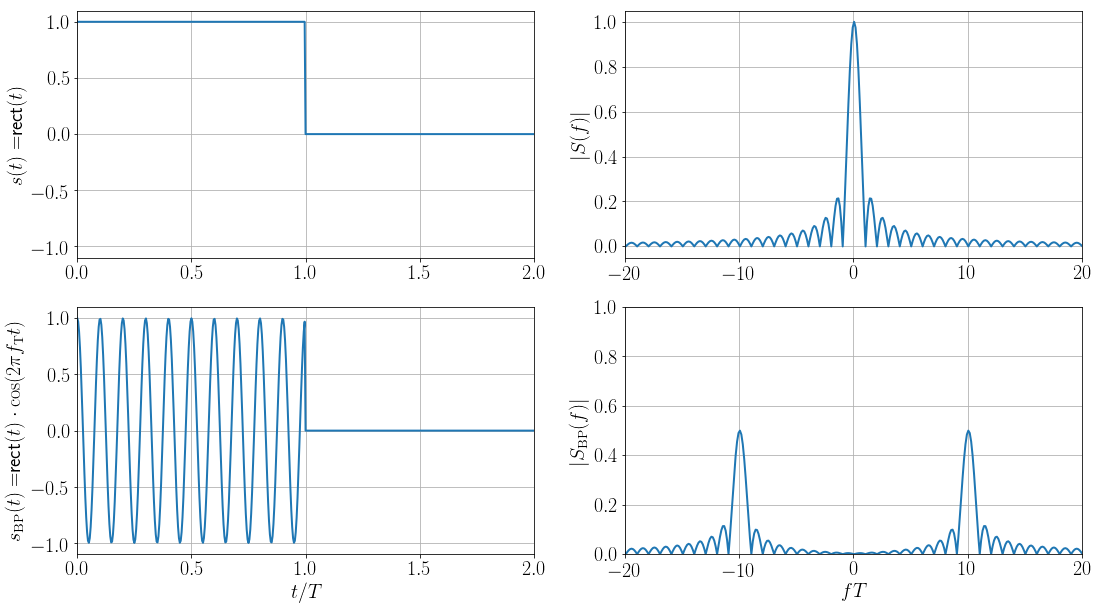

In [4]:
# plotting results
plt.subplot(221)
plt.plot( np.arange(np.size(rect))*t_symb/n_up, rect, linewidth=2.0, label='Rect')

plt.ylim( (-1.1, 1.1 ) ) 
plt.grid( True )
plt.ylabel( '$s(t)=$'+'rect$(t)$' )
plt.xlim( ( 0, 2*t_symb ) )


plt.subplot(222)
plt.plot( f_vec, magnitude_rect , linewidth=2.0, label='Rect')  

plt.grid( True ) 
plt.ylabel( '$|S(f)|$' )    
plt.xlim( ( -2 * f_c, 2 * f_c ) )


plt.subplot(223)
plt.plot( np.arange(np.size(rect_modulated))*t_symb/n_up, rect_modulated, linewidth=2.0, label='Rect')

plt.ylim( (-1.1, 1.1 ) ) 
plt.grid( True )  
plt.ylabel( '$s_\mathrm{BP}(t)=$'+'rect$(t) \cdot \cos(2\pi f_\\mathrm{T} t)$' )
plt.xlabel( '$t/T$' )
plt.xlim( (0, 2*t_symb ) )


plt.subplot(224)
plt.plot( f_vec, magnitude_rect_modulated, linewidth=2.0, label='Rect mod.')  

plt.grid( True )       
plt.xlim( (-2*f_c, 2*f_c ) )
plt.ylim( (0, 1 ) )
plt.ylabel( '$|S_\mathrm{BP}(f)|$' )
plt.xlabel( '$fT$' )